In [1]:
run /home/alec/galvanize/capstone/Forecasting_Walmart_Sales/src/script.py

In [5]:
def plot_series_and_difference(axs, series, title):
    diff = series.diff()
    axs[0].plot(series.index, series)
    axs[0].set_title("Raw Series: {}".format(title))
    axs[1].plot(series.index, diff)
    axs[1].set_title("Series of First Differences: {}".format(title))
    
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [6]:
CA3_Foods3_Graphs = Graphs(make_series('CA_3', 'FOODS_3'), 'M', 'Walmart CA3 Store Foods3 Department Sales')

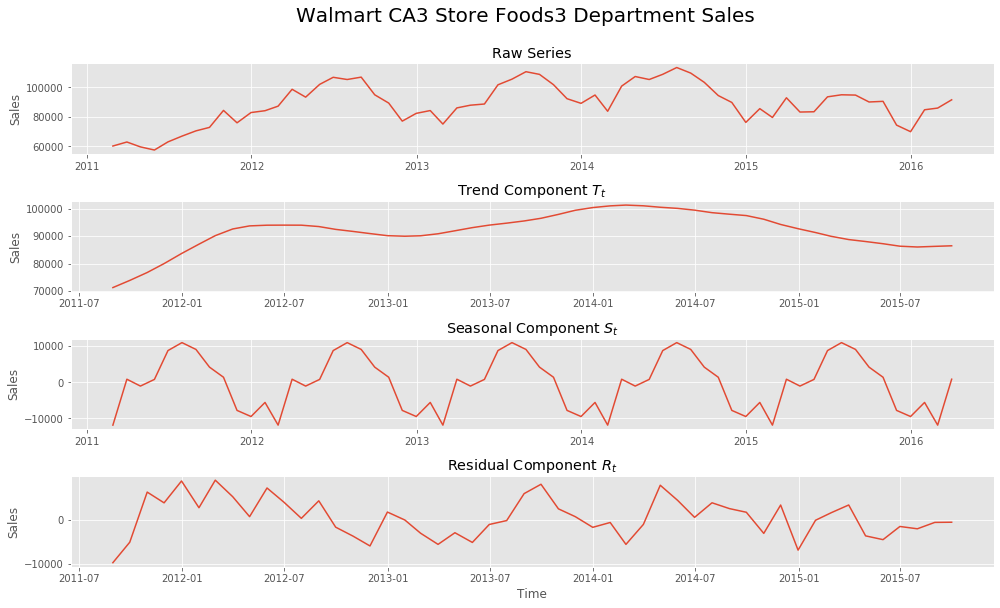

In [7]:
CA3_Foods3_Graphs.TSR()

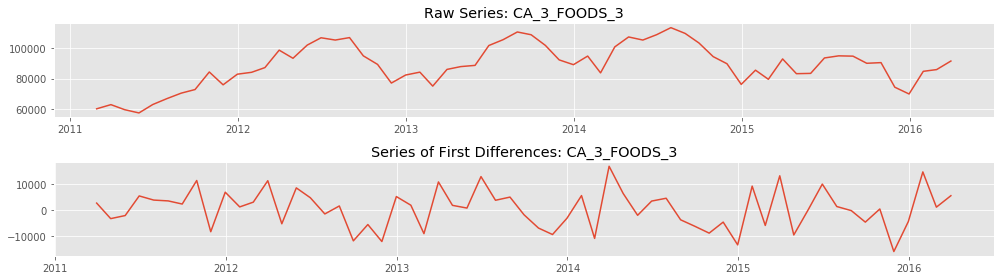

In [8]:
fig, axs = plt.subplots(2, figsize=(14, 4))
plot_series_and_difference(axs, resample_series(make_series('CA_3', 'FOODS_3'), 'M'), 'CA_3_FOODS_3')
fig.tight_layout()

In [9]:
len(series_setup(store_id, dept_id))

70

In [10]:
#check for stationary with no differencing

def no_diff_adf_pvalue(series):
    test = sm.tsa.stattools.adfuller(series[list(series)[0]])
    return round(test[1], 2)

lst= []
for i in series_setup(store_id, dept_id):
    lst.append(resample_series(make_series(i[0], i[1]), 'M'))

lst1 = []
for i in lst:
    lst1.append(no_diff_adf_pvalue(i))
    
lst_of_series_that_need_differencing = []
lst_of_series_no_differencing = []
for idx, val in enumerate(series_setup(store_id, dept_id)):
    #print(f"ADF p-value for {val} series: {lst1[idx]}")
    if lst1[idx] <= .05:
        lst_of_series_no_differencing.append(val)
    else:
        lst_of_series_that_need_differencing.append(val)
len(lst_of_series_that_need_differencing)

59

In [11]:
#check for stationary with 1 differencing

def one_diff_adf_pvalue(series):
    test = sm.tsa.stattools.adfuller(series[list(series)[0]].diff()[1:])
    return round(test[1], 2)

lst2= []
for i in lst_of_series_that_need_differencing:
    lst2.append(resample_series(make_series(i[0], i[1]), 'M'))

lst3 = []
for i in lst2:
    lst3.append(one_diff_adf_pvalue(i))

lst_of_series_that_need_one_differencing = []
lst_of_series_two_differencing = []
for idx, val in enumerate(lst_of_series_that_need_differencing):
    #print(f"ADF p-value for {val} series: {lst3[idx]}")
    if lst3[idx] <= .05:
        lst_of_series_that_need_one_differencing.append(val)
    else:
        lst_of_series_two_differencing.append(val)

len(lst_of_series_that_need_one_differencing)
len(lst_of_series_two_differencing)

21

In [12]:
#check for stationary with 2 differencing

def two_diff_adf_pvalue(series):
    test = sm.tsa.stattools.adfuller(series[list(series)[0]].diff().diff()[2:])
    return round(test[1], 2)

lst4= []
for i in lst_of_series_two_differencing:
    lst4.append(resample_series(make_series(i[0], i[1]), 'M'))

lst5 = []
for i in lst4:
    lst5.append(two_diff_adf_pvalue(i))

two_diff_lst = []
lst_of_series_three_differencing = []
for idx, val in enumerate(lst_of_series_two_differencing):
    #print(f"ADF p-value for {val} series: {lst5[idx]}")
    if lst5[idx] <= .05:
        two_diff_lst.append(val)
    else:
        lst_of_series_three_differencing.append(val)
two_diff_lst

[['CA_1', 'HOUSEHOLD_1'],
 ['CA_1', 'FOODS_1'],
 ['CA_2', 'FOODS_2'],
 ['CA_3', 'HOBBIES_2'],
 ['CA_3', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_2'],
 ['CA_4', 'FOODS_1'],
 ['TX_1', 'HOBBIES_2'],
 ['TX_1', 'FOODS_2'],
 ['TX_2', 'HOBBIES_2'],
 ['TX_2', 'HOUSEHOLD_2'],
 ['TX_2', 'FOODS_1'],
 ['TX_2', 'FOODS_2'],
 ['TX_3', 'HOUSEHOLD_2'],
 ['TX_3', 'FOODS_2'],
 ['TX_3', 'FOODS_3'],
 ['WI_1', 'HOBBIES_2'],
 ['WI_2', 'HOUSEHOLD_1'],
 ['WI_2', 'HOUSEHOLD_2'],
 ['WI_3', 'HOUSEHOLD_1']]

In [13]:
print(len(lst_of_series_no_differencing))
print(len(lst_of_series_that_need_one_differencing))
print(len(two_diff_lst))

11
38
21


In [14]:
no_diff_lst = lst_of_series_no_differencing
one_diff_lst = lst_of_series_that_need_one_differencing
two_diff_lst = two_diff_lst
one_diff_lst

[['CA_1', 'HOBBIES_1'],
 ['CA_1', 'HOBBIES_2'],
 ['CA_1', 'HOUSEHOLD_2'],
 ['CA_1', 'FOODS_2'],
 ['CA_2', 'HOBBIES_2'],
 ['CA_2', 'HOUSEHOLD_1'],
 ['CA_2', 'HOUSEHOLD_2'],
 ['CA_2', 'FOODS_3'],
 ['CA_3', 'HOBBIES_1'],
 ['CA_3', 'HOUSEHOLD_2'],
 ['CA_3', 'FOODS_2'],
 ['CA_4', 'HOBBIES_1'],
 ['CA_4', 'HOBBIES_2'],
 ['CA_4', 'FOODS_2'],
 ['TX_1', 'HOBBIES_1'],
 ['TX_1', 'HOUSEHOLD_1'],
 ['TX_1', 'HOUSEHOLD_2'],
 ['TX_1', 'FOODS_1'],
 ['TX_1', 'FOODS_3'],
 ['TX_2', 'HOUSEHOLD_1'],
 ['TX_3', 'HOBBIES_1'],
 ['TX_3', 'HOUSEHOLD_1'],
 ['WI_1', 'HOBBIES_1'],
 ['WI_1', 'HOUSEHOLD_1'],
 ['WI_1', 'HOUSEHOLD_2'],
 ['WI_1', 'FOODS_2'],
 ['WI_1', 'FOODS_3'],
 ['WI_2', 'HOBBIES_1'],
 ['WI_2', 'HOBBIES_2'],
 ['WI_2', 'FOODS_1'],
 ['WI_2', 'FOODS_2'],
 ['WI_2', 'FOODS_3'],
 ['WI_3', 'HOBBIES_1'],
 ['WI_3', 'HOBBIES_2'],
 ['WI_3', 'HOUSEHOLD_2'],
 ['WI_3', 'FOODS_1'],
 ['WI_3', 'FOODS_2'],
 ['WI_3', 'FOODS_3']]

In [15]:
#Arima Models for One Differenced Stores

In [16]:
y = resample_series(make_series('CA_1', 'HOUSEHOLD_2'),'M')
len(y)

62

In [17]:
train, test = train_test_split(y, train_size=60)
model = pm.auto_arima(train, seasonal=True)

In [18]:
model

ARIMA(order=(5, 1, 1))

In [19]:
forecasts = model.predict(test.shape[0]).tolist()
forecasts

[6058.545038672534, 6422.035480227196]

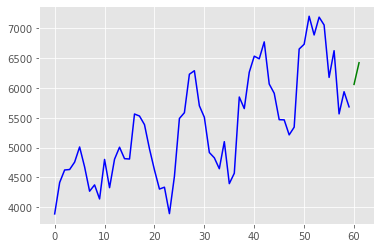

In [20]:
x = np.arange(y.shape[0])
plt.plot(x[:60], train, c='blue')
plt.plot(x[60:], forecasts, c='green')
plt.show()

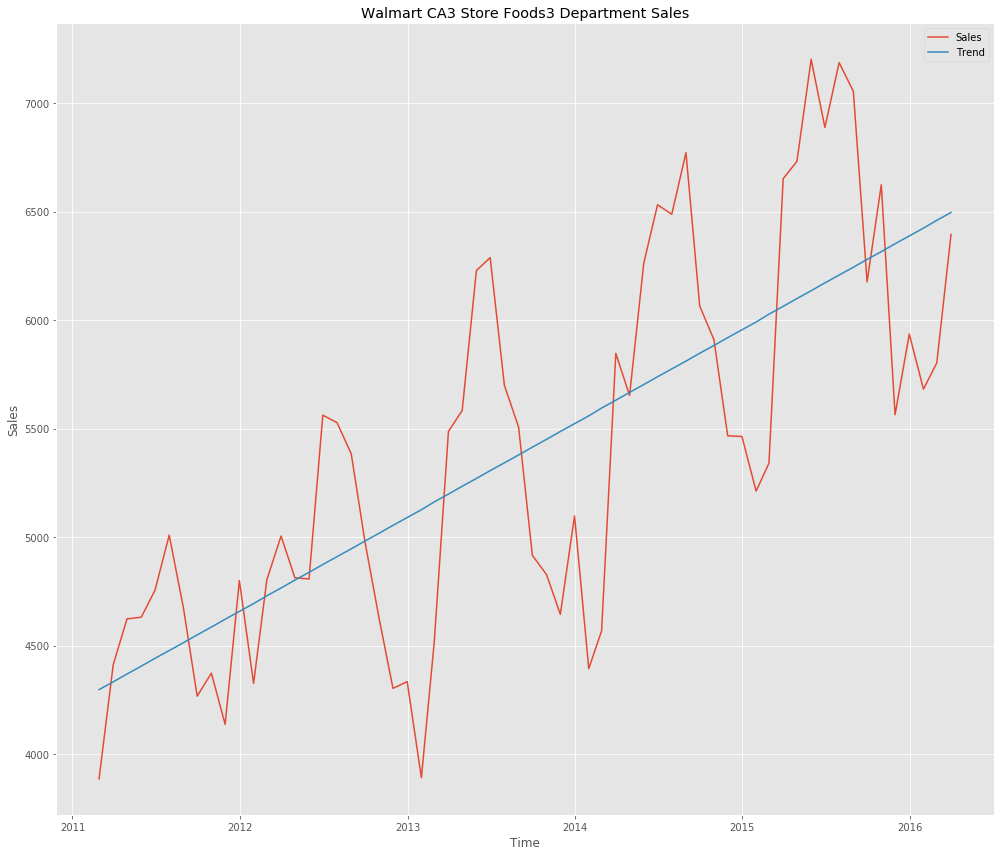

In [21]:
a = Graphs(make_series('CA_1', 'HOUSEHOLD_2'), 'M', 'Walmart CA3 Store Foods3 Department Sales')
a.linear_trend()

In [22]:
make_forecast(make_series('CA_1', 'HOUSEHOLD_2'), 'M', 2, 1, 2)

(5911.009760475517, 0.018612745213771736, 5803)

In [23]:
make_forecast(make_series('CA_1', 'HOUSEHOLD_2'), 'M', 2, 2, 3)

(6844.416939553039, 0.07027630016466598, 6395)

In [24]:
feb_act = 5803
mar_act = 6395
feb_error = (forecasts[0] - feb_act)/feb_act
mar_error = (forecasts[0] - mar_act)/mar_act

In [25]:
feb_error

0.04403671181673863

In [26]:
mar_error

-0.05261219098162091

In [27]:
series_setup(store_id, dept_id)

[['CA_1', 'HOBBIES_1'],
 ['CA_1', 'HOBBIES_2'],
 ['CA_1', 'HOUSEHOLD_1'],
 ['CA_1', 'HOUSEHOLD_2'],
 ['CA_1', 'FOODS_1'],
 ['CA_1', 'FOODS_2'],
 ['CA_1', 'FOODS_3'],
 ['CA_2', 'HOBBIES_1'],
 ['CA_2', 'HOBBIES_2'],
 ['CA_2', 'HOUSEHOLD_1'],
 ['CA_2', 'HOUSEHOLD_2'],
 ['CA_2', 'FOODS_1'],
 ['CA_2', 'FOODS_2'],
 ['CA_2', 'FOODS_3'],
 ['CA_3', 'HOBBIES_1'],
 ['CA_3', 'HOBBIES_2'],
 ['CA_3', 'HOUSEHOLD_1'],
 ['CA_3', 'HOUSEHOLD_2'],
 ['CA_3', 'FOODS_1'],
 ['CA_3', 'FOODS_2'],
 ['CA_3', 'FOODS_3'],
 ['CA_4', 'HOBBIES_1'],
 ['CA_4', 'HOBBIES_2'],
 ['CA_4', 'HOUSEHOLD_1'],
 ['CA_4', 'HOUSEHOLD_2'],
 ['CA_4', 'FOODS_1'],
 ['CA_4', 'FOODS_2'],
 ['CA_4', 'FOODS_3'],
 ['TX_1', 'HOBBIES_1'],
 ['TX_1', 'HOBBIES_2'],
 ['TX_1', 'HOUSEHOLD_1'],
 ['TX_1', 'HOUSEHOLD_2'],
 ['TX_1', 'FOODS_1'],
 ['TX_1', 'FOODS_2'],
 ['TX_1', 'FOODS_3'],
 ['TX_2', 'HOBBIES_1'],
 ['TX_2', 'HOBBIES_2'],
 ['TX_2', 'HOUSEHOLD_1'],
 ['TX_2', 'HOUSEHOLD_2'],
 ['TX_2', 'FOODS_1'],
 ['TX_2', 'FOODS_2'],
 ['TX_2', 'FOODS_3'],
 ['T

In [28]:
art_dict = {}
art_dict[1] = resample_series(make_series('CA_1', 'HOBBIES_2'),'M')[44:]
art_dict[4] = resample_series(make_series('CA_1', 'FOODS_1'),'M')[22:]
art_dict[8] = resample_series(make_series('CA_2', 'HOBBIES_2'),'M')[38:]
art_dict[12] = resample_series(make_series('CA_2', 'FOODS_2'),'M')[-7:] #added one bc I was getting an error, used to be [-6:]
art_dict[13] = resample_series(make_series('CA_2', 'FOODS_3'),'M')[53:]
art_dict[15] = resample_series(make_series('CA_3', 'HOBBIES_2'),'M')[38:]
art_dict[22] = resample_series(make_series('CA_4', 'HOBBIES_2'),'M')[38:]
art_dict[25] = resample_series(make_series('CA_4', 'FOODS_1'),'M')[16:]
#art_dict[29] = resample_series(make_series('TX_1', 'HOBBIES_2'),'M')[38:]
art_dict[30] = resample_series(make_series('TX_1', 'HOUSEHOLD_1'),'M')[16:]
art_dict[32] = resample_series(make_series('TX_1', 'FOODS_1'),'M')[14:]
art_dict[39] = resample_series(make_series('TX_2', 'FOODS_1'),'M')[46:]
art_dict[40] = resample_series(make_series('TX_2', 'FOODS_2'),'M')[26:]
art_dict[43] = resample_series(make_series('TX_3', 'HOBBIES_2'),'M')[46:]
art_dict[44] = resample_series(make_series('TX_3', 'HOUSEHOLD_1'),'M')[26:]
art_dict[46] = resample_series(make_series('TX_3', 'FOODS_1'),'M')[26:]
art_dict[50] = resample_series(make_series('WI_1', 'HOBBIES_2'),'M')[41:]
art_dict[57] = resample_series(make_series('WI_2', 'HOBBIES_2'),'M')[26:]
art_dict[60] = resample_series(make_series('WI_2', 'FOODS_1'),'M')[16:]
art_dict[66] = resample_series(make_series('WI_3', 'HOUSEHOLD_2'),'M')[40:]
art_dict[68] = resample_series(make_series('WI_3', 'FOODS_2'),'M')[34:]
art_dict[69] = resample_series(make_series('WI_3', 'FOODS_3'),'M')[26:]

In [29]:
art_dict[12]

,TOTAL
date,
2015-09-30,12764
2015-10-31,14520
2015-11-30,13978
2015-12-31,13449
2016-01-31,15768
2016-02-29,13773
2016-03-31,14590


In [30]:
y = art_dict[12]
train, test = train_test_split(y, train_size=len(y)-2)
model = pm.auto_arima(train, seasonal=True)
forecasts = model.predict(test.shape[0]).tolist()

forecasts

[14095.799999999996, 14095.799999999996]

In [31]:
    lst_of_forecasts = []
    for _ in range(2):
        lst_of_forecasts.append([]) 
    series_lst = []
    for idx, val in enumerate(series_setup(store_id, dept_id)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), 'M'))
        else:
            series_lst.append(art_dict[idx])
    count = 0
    #for i in series_lst:
        #print(count)
        #y = resample_series(make_series(i[0], i[1]),'M')
        #train, test = train_test_split(i, train_size=len(i)-2)
        #model = pm.auto_arima(train, seasonal=True)
        #forecasts = model.predict(test.shape[0]).tolist()
        #for idx, val in enumerate(forecasts):
            #lst_of_forecasts[idx].append(val)
        #count += 1

    for i in series_lst:
        print(len(i))

62
18
62
62
40
62
62
62
24
62
62
62
7
9
62
24
62
62
62
62
62
62
24
62
62
46
62
62
62
62
46
62
48
62
62
62
62
62
62
16
36
62
62
16
36
62
36
62
62
62
21
62
62
62
62
62
62
36
62
62
46
62
62
62
62
62
22
62
28
36


In [32]:
def arima_forecast(store_ids, dept_ids, art_dict, holdout_periods, interval):
    lst_of_forecasts = []
    for _ in range(holdout_periods):
        lst_of_forecasts.append([]) 
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
    count = 0
    for i in series_lst:
        #y = resample_series(make_series(i[0], i[1]),'M')
        train, test = train_test_split(i, train_size=len(i)-holdout_periods)
        model = pm.auto_arima(train, seasonal=True)
        forecasts = model.predict(test.shape[0]).tolist()
        for idx, val in enumerate(forecasts):
            lst_of_forecasts[idx].append(val)
    return lst_of_forecasts, series_lst

In [33]:
arima_forecasts = arima_forecast(store_id, dept_id, art_dict, 2, 'M')[0]
series_lst = arima_forecast(store_id, dept_id, art_dict, 2, 'M')[1]

In [34]:
arima_feb = arima_forecasts[0]
arima_mar = arima_forecasts[1]

forecast_lst_feb = []
for i in series_lst:
    forecast_lst_feb.append(make_forecast(i, 'M', 2, 1, 2))
    
forecast_lst_mar = []
for i in series_lst:
    forecast_lst_mar.append(make_forecast(i, 'M', 2, 2, 3))

feb_actuals = []
for i in forecast_lst_feb:
    feb_actuals.append(i[2])

mar_actuals = []
for i in forecast_lst_mar:
    mar_actuals.append(i[2])

In [35]:
def get_actuals(series_lst, periods_back):
    actuals = []
    for i in series_lst:
        if periods_back == 1:
            actuals.append(i[-1:].iloc[0,0])
        else:
            actuals.append(i[-periods_back:-1].iloc[0,0])
    return actuals

feb_actuals = get_actuals(series_lst, 2)
mar_actuals = get_actuals(series_lst, 1)

In [36]:
def calculate_errors(actual, forecast):
    return abs((actual-forecast)/actual)

In [37]:
arima_feb_error = []
for idx, val in enumerate(feb_actuals):
    arima_feb_error.append(round(calculate_errors(val, arima_feb[idx]), 2))
    
arima_mar_error = []
for idx, val in enumerate(mar_actuals):
    arima_mar_error.append(round(calculate_errors(val, arima_mar[idx]), 2))
    
arima_feb_error = np.array(arima_feb_error)
arima_mar_error = np.array(arima_mar_error)
#print(arima_feb_error)
#print(arima_mar_error)

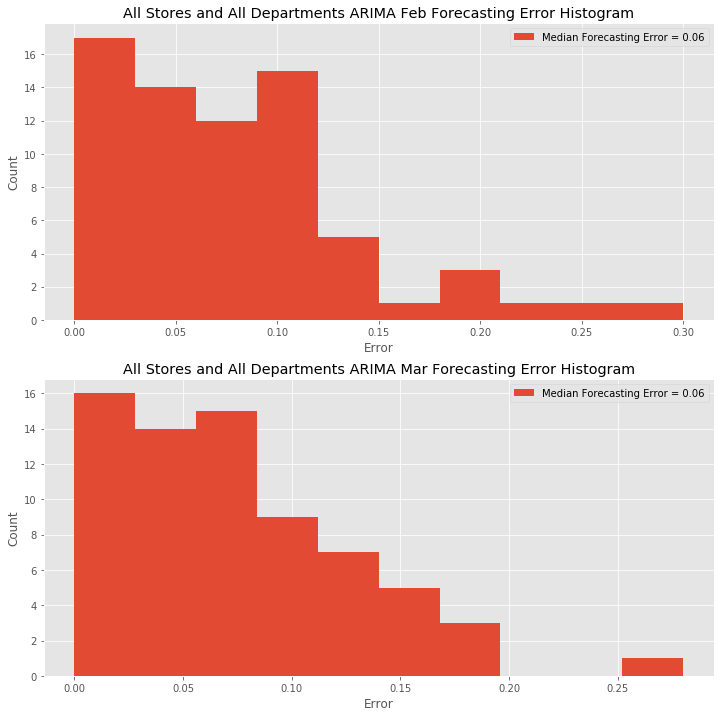

In [38]:
fig, axs = plt.subplots(2, figsize = (12,12))
axs[0].hist(arima_feb_error, label = f'Median Forecasting Error = {round(np.median(arima_feb_error),2)}')
axs[0].set_title('All Stores and All Departments ARIMA Feb Forecasting Error Histogram')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Error')
axs[0].legend()

axs[1].hist(arima_mar_error, label = f'Median Forecasting Error = {round(np.median(arima_mar_error),2)}')
axs[1].set_title('All Stores and All Departments ARIMA Mar Forecasting Error Histogram')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Error')
axs[1].legend()
plt.show()

In [39]:
art_dict = {}
art_dict[1] = resample_series(make_series('CA_1', 'HOBBIES_2'),'M')[44:]
art_dict[4] = resample_series(make_series('CA_1', 'FOODS_1'),'M')[22:]
art_dict[8] = resample_series(make_series('CA_2', 'HOBBIES_2'),'M')[38:]
art_dict[12] = resample_series(make_series('CA_2', 'FOODS_2'),'M')[-13:] #added one bc I was getting an error, used to be [-6:]
art_dict[13] = resample_series(make_series('CA_2', 'FOODS_3'),'M')[53:]
art_dict[15] = resample_series(make_series('CA_3', 'HOBBIES_2'),'M')[38:]
art_dict[22] = resample_series(make_series('CA_4', 'HOBBIES_2'),'M')[38:]
art_dict[25] = resample_series(make_series('CA_4', 'FOODS_1'),'M')[16:]
#art_dict[29] = resample_series(make_series('TX_1', 'HOBBIES_2'),'M')[38:]
art_dict[30] = resample_series(make_series('TX_1', 'HOUSEHOLD_1'),'M')[16:]
art_dict[32] = resample_series(make_series('TX_1', 'FOODS_1'),'M')[14:]
art_dict[39] = resample_series(make_series('TX_2', 'FOODS_1'),'M')[46:]
art_dict[40] = resample_series(make_series('TX_2', 'FOODS_2'),'M')[26:]
art_dict[43] = resample_series(make_series('TX_3', 'HOBBIES_2'),'M')[46:]
art_dict[44] = resample_series(make_series('TX_3', 'HOUSEHOLD_1'),'M')[26:]
art_dict[46] = resample_series(make_series('TX_3', 'FOODS_1'),'M')[26:]
art_dict[50] = resample_series(make_series('WI_1', 'HOBBIES_2'),'M')[41:]
art_dict[57] = resample_series(make_series('WI_2', 'HOBBIES_2'),'M')[26:]
art_dict[60] = resample_series(make_series('WI_2', 'FOODS_1'),'M')[16:]
art_dict[66] = resample_series(make_series('WI_3', 'HOUSEHOLD_2'),'M')[40:]
art_dict[68] = resample_series(make_series('WI_3', 'FOODS_2'),'M')[34:]
art_dict[69] = resample_series(make_series('WI_3', 'FOODS_3'),'M')[26:]

In [40]:
arima_forecasts6 = arima_forecast(store_id, dept_id, art_dict, 6, 'M')[0]
series_lst6 = arima_forecast(store_id, dept_id, art_dict, 6, 'M')[1]

In [41]:
arima6_oct = arima_forecasts6[0]
arima6_nov = arima_forecasts6[1]
arima6_dec = arima_forecasts6[2]
arima6_jan = arima_forecasts6[3]
arima6_feb = arima_forecasts6[4]
arima6_mar = arima_forecasts6[5]

oct_actuals = get_actuals(series_lst6, 6)
nov_actuals = get_actuals(series_lst6, 5)
dec_actuals = get_actuals(series_lst6, 4)
jan_actuals = get_actuals(series_lst6, 3)
feb_actuals = get_actuals(series_lst6, 2)
mar_actuals = get_actuals(series_lst6, 1)

arima6_oct_error = []
for idx, val in enumerate(oct_actuals):
    arima6_oct_error.append(round(calculate_errors(val, arima6_oct[idx]), 2))
    
arima6_nov_error = []
for idx, val in enumerate(nov_actuals):
    arima6_nov_error.append(round(calculate_errors(val, arima6_nov[idx]), 2))
    
arima6_dec_error = []
for idx, val in enumerate(dec_actuals):
    arima6_dec_error.append(round(calculate_errors(val, arima6_dec[idx]), 2))
    
arima6_jan_error = []
for idx, val in enumerate(jan_actuals):
    arima6_jan_error.append(round(calculate_errors(val, arima6_jan[idx]), 2))
    
arima6_feb_error = []
for idx, val in enumerate(feb_actuals):
    arima6_feb_error.append(round(calculate_errors(val, arima6_feb[idx]), 2))
    
arima6_mar_error = []
for idx, val in enumerate(mar_actuals):
    arima6_mar_error.append(round(calculate_errors(val, arima6_mar[idx]), 2))
    
arima6_oct_error = np.array(arima6_oct_error)
arima6_nov_error = np.array(arima6_nov_error)
arima6_dec_error = np.array(arima6_dec_error)
arima6_jan_error = np.array(arima6_jan_error)
arima6_feb_error = np.array(arima6_feb_error)
arima6_mar_error = np.array(arima6_mar_error)

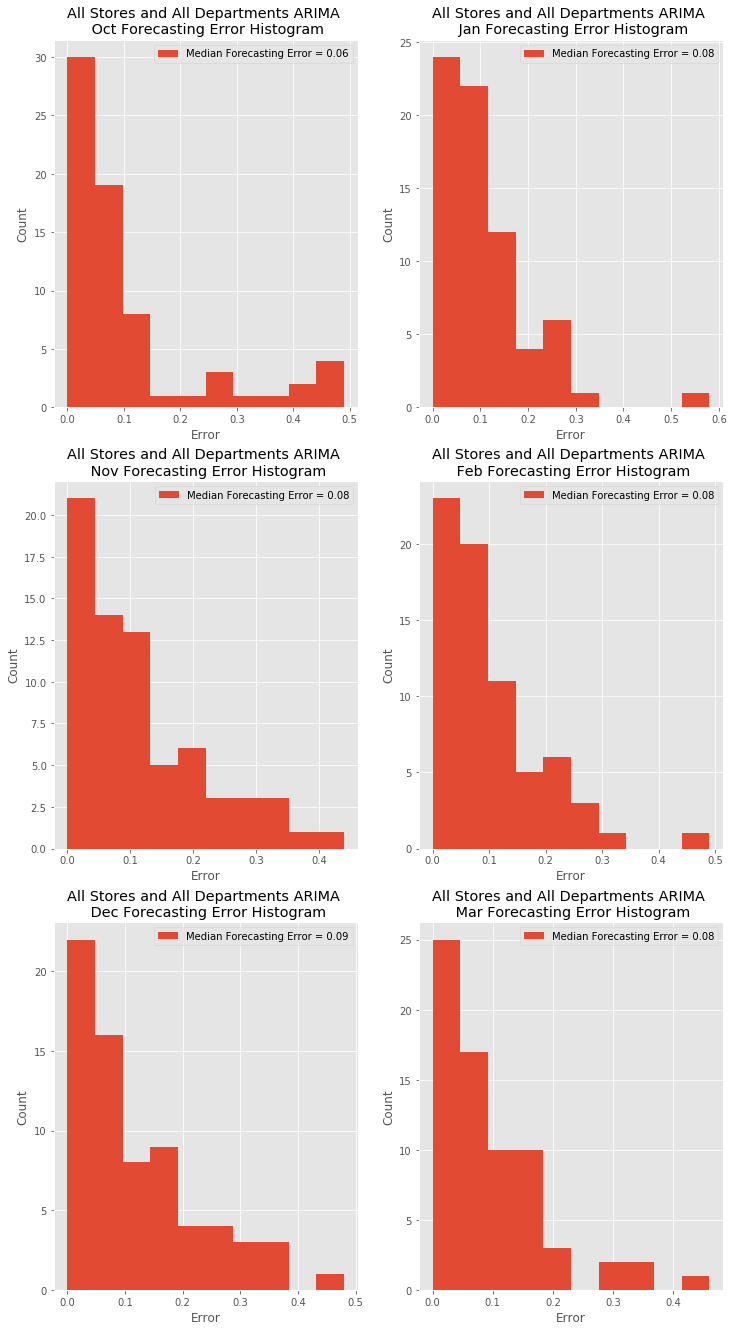

In [42]:
fig, axs = plt.subplots(3, 2, figsize = (12,23))
axs[0, 0].hist(arima6_oct_error, label = f'Median Forecasting Error = {round(np.median(arima6_oct_error),2)}')
axs[0, 0].set_title('All Stores and All Departments ARIMA \n Oct Forecasting Error Histogram')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xlabel('Error')
axs[0, 0].legend()

axs[1, 0].hist(arima6_nov_error, label = f'Median Forecasting Error = {round(np.median(arima6_nov_error),2)}')
axs[1, 0].set_title('All Stores and All Departments ARIMA \n Nov Forecasting Error Histogram')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlabel('Error')
axs[1, 0].legend()

axs[2, 0].hist(arima6_dec_error, label = f'Median Forecasting Error = {round(np.median(arima6_dec_error),2)}')
axs[2, 0].set_title('All Stores and All Departments ARIMA \n Dec Forecasting Error Histogram')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_xlabel('Error')
axs[2, 0].legend()

axs[0, 1].hist(arima6_jan_error, label = f'Median Forecasting Error = {round(np.median(arima6_jan_error),2)}')
axs[0, 1].set_title('All Stores and All Departments ARIMA \n Jan Forecasting Error Histogram')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xlabel('Error')
axs[0, 1].legend()

axs[1, 1].hist(arima6_feb_error, label = f'Median Forecasting Error = {round(np.median(arima6_feb_error),2)}')
axs[1, 1].set_title('All Stores and All Departments ARIMA \n Feb Forecasting Error Histogram')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlabel('Error')
axs[1, 1].legend()

axs[2, 1].hist(arima6_mar_error, label = f'Median Forecasting Error = {round(np.median(arima6_mar_error),2)}')
axs[2, 1].set_title('All Stores and All Departments ARIMA \n Mar Forecasting Error Histogram')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_xlabel('Error')
axs[2, 1].legend()

plt.show()

In [43]:
resample_series(big_all, 'M')

,TOTAL
date,
2011-02-28,726375
2011-03-31,763567
2011-04-30,737713
2011-05-31,719562
2011-06-30,753380
...,...
2015-11-30,1113976
2015-12-31,1126222
2016-01-31,1215286


In [44]:
#['CA_1', 'HOBBIES_1'

In [45]:
s = resample_series(make_series('CA_1', 'HOBBIES_1'), 'M')
train, test = train_test_split(s, train_size=len(s)-6)
model = pm.auto_arima(train, seasonal=True)
forecasts = model.predict(test.shape[0]).tolist()

In [46]:
s[-6:].index[0]

Timestamp('2015-10-31 00:00:00', freq='M')

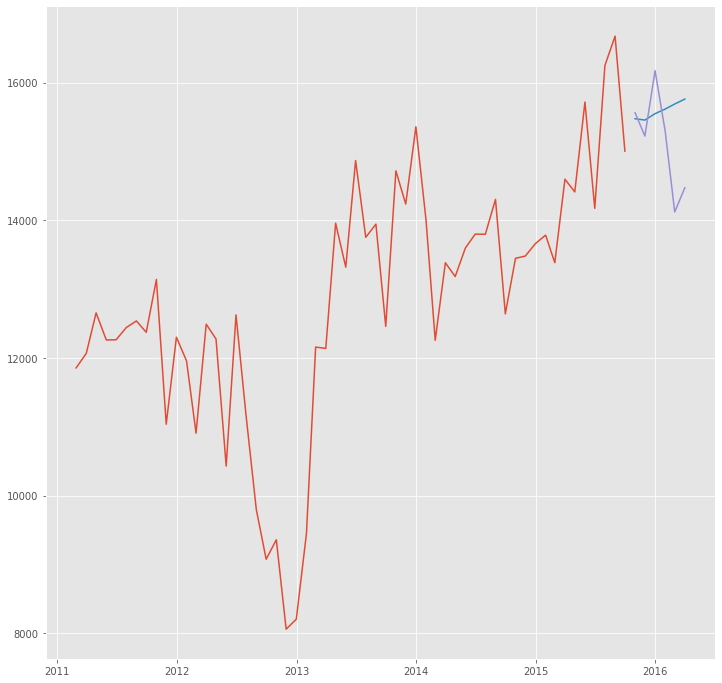

In [47]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.plot(train.index, train)
ax.plot(test.index, forecasts)
ax.plot(s[-6:].index, s[-6:])
plt.show()

In [48]:
lst_of_actuals = [oct_actuals, nov_actuals, dec_actuals, jan_actuals, feb_actuals, mar_actuals]
for i in lst_of_actuals:
    print(i[0])

15563
15224
16175
15292
14121
14473


In [49]:
def six_period_plot_forecast_vs_arima(store, department, resample_interval):
    s = resample_series(make_series(store, department), resample_interval)
    train, test = train_test_split(s, train_size=len(s)-6)
    model = pm.auto_arima(train, seasonal=True)
    forecasts = model.predict(test.shape[0]).tolist()
    
    fig, ax = plt.subplots(figsize = (18, 12))
    ax.plot(train.index, train, label = 'Historical Sales')
    ax.plot(test.index, forecasts, label = 'Forecasted Sales')
    ax.plot(s[-6:].index, s[-6:], label = 'Actual Sales')
    ax.axvline(x = s[-6:].index[0], color='k', linestyle='--', label = 'End of Historical Sales')
    ax.set_title(f'Comparison of Actual vs Forecasted Sales \n for the {store} store and {department} department')
    ax.set_xlabel('Time')
    ax.set_ylabel('Sales')
    ax.legend(fontsize = 12)
    plt.show()

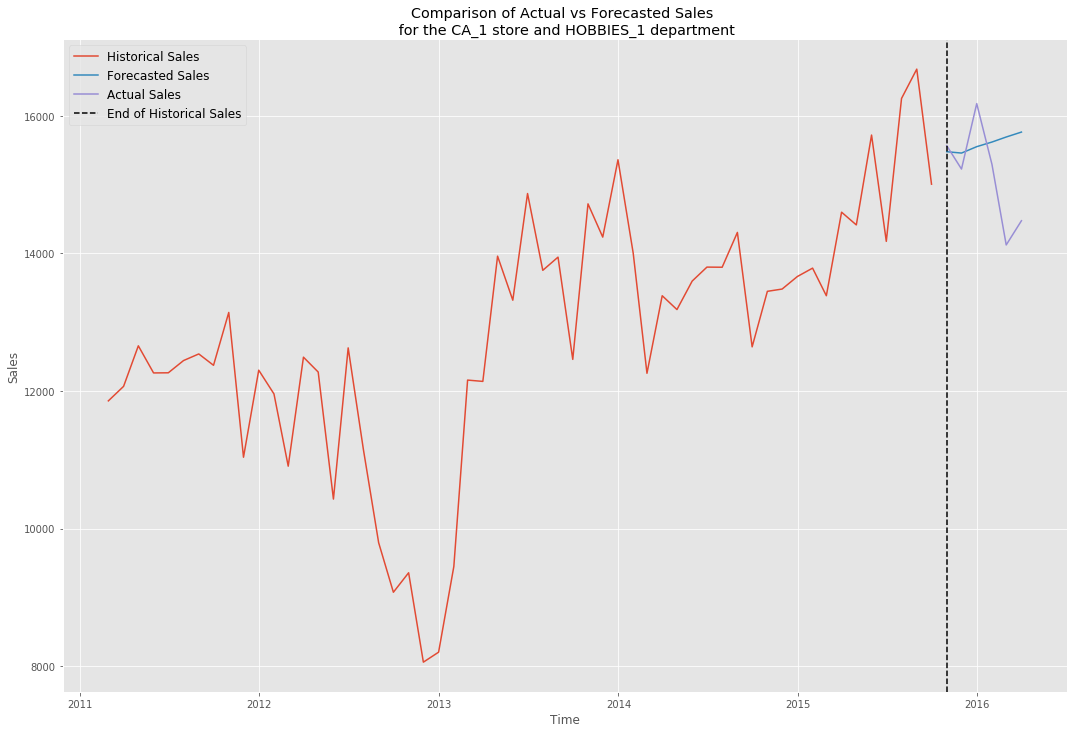

In [50]:
six_period_plot_forecast_vs_arima('CA_1', 'HOBBIES_1', 'M')

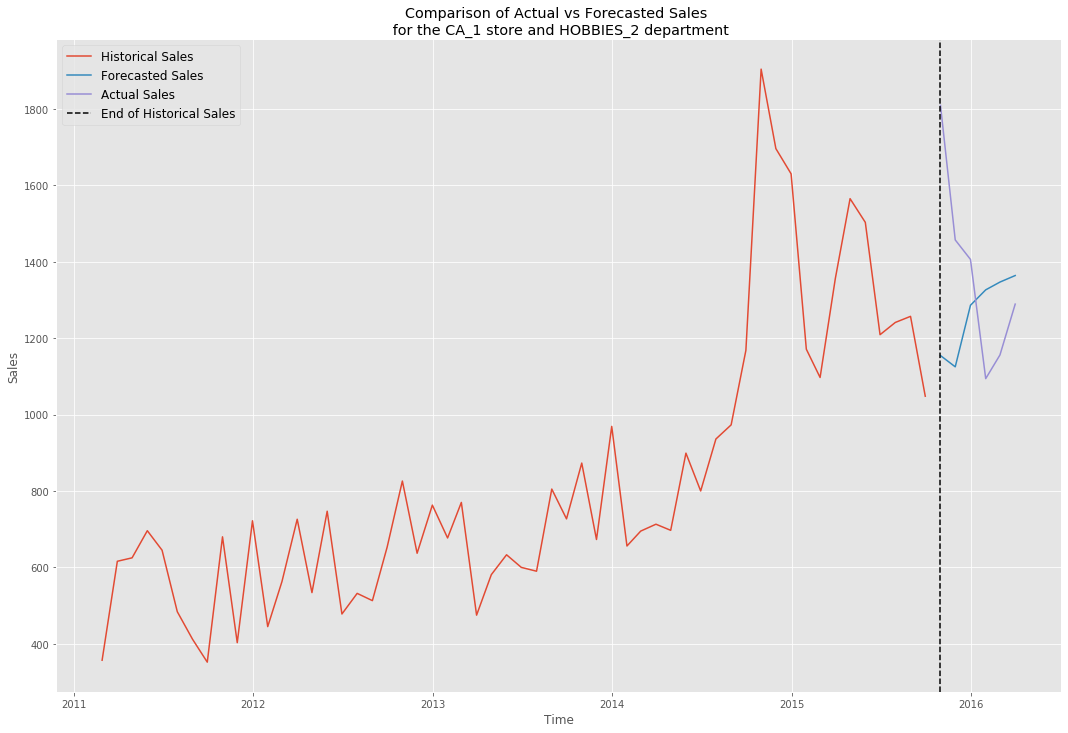

In [51]:
six_period_plot_forecast_vs_arima('CA_1', 'HOBBIES_2', 'M')

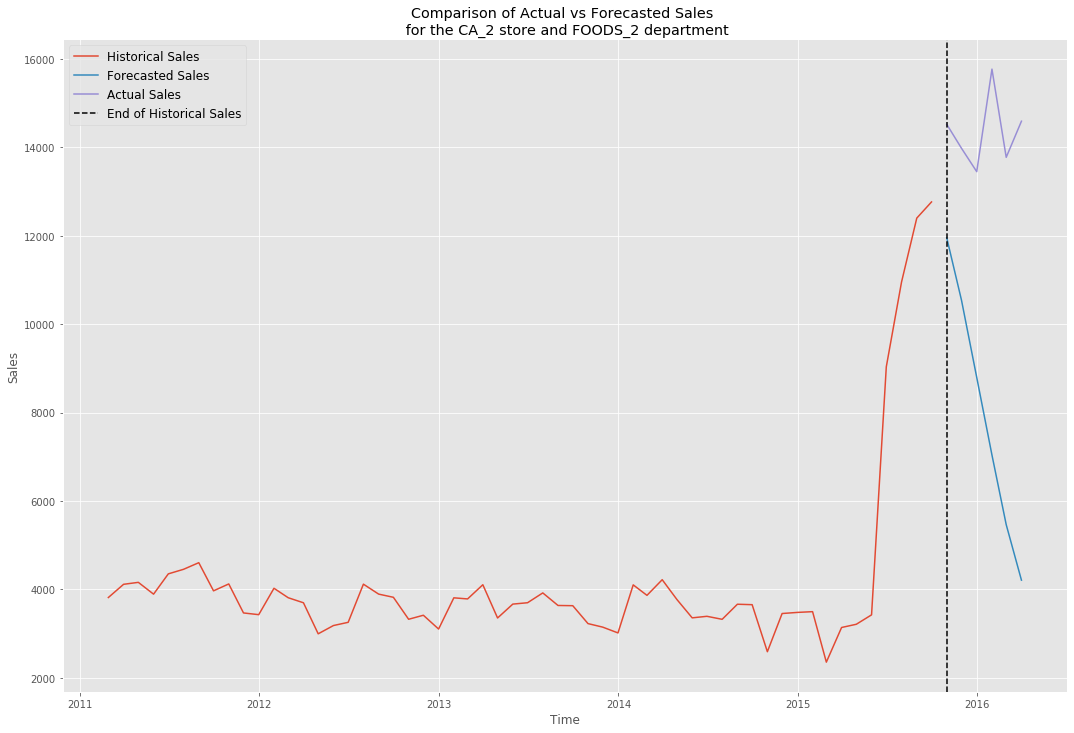

In [52]:
six_period_plot_forecast_vs_arima('CA_2', 'FOODS_2', 'M')

In [100]:
lst_of_stores = series_setup(store_id, dept_id)

def updated_six_period_plot_forecast_vs_arima(idx):
    series = series_lst6[idx]
    train, test = train_test_split(series, train_size=len(series)-6)
    model = pm.auto_arima(train, seasonal=False, m=12)
    forecasts = model.predict(test.shape[0]).tolist()
    print(model.summary())
    
    fig, ax = plt.subplots(figsize = (18, 12))
    ax.plot(train.index, train, label = 'Historical Sales Used for Forecast')
    ax.plot(test.index, forecasts, label = 'Forecasted Sales')
    ax.plot(series[-6:].index, series[-6:], label = 'Actual Sales')
    ax.axvline(x = series[-6:].index[0], color='k', linestyle='--', label = 'End of Historical Sales')
    ax.set_title(f'Comparison of Actual vs Forecasted Sales \n for the {lst_of_stores[idx][0]} Store and {lst_of_stores[idx][1]} Department')
    ax.set_xlabel('Time')
    ax.set_ylabel('Sales')
    ax.legend(fontsize = 12)
    plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -64.173
Date:                Wed, 03 Jun 2020   AIC                            136.346
Time:                        09:22:31   BIC                            136.130
Sample:                             0   HQIC                           133.672
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3666.2407   1761.935      2.081      0.037     212.911    7119.570
ar.L1          1.1784      0.496      2.375      0.018       0.206       2.151
ar.L2         -0.6231      0.481     -1.295      0.1

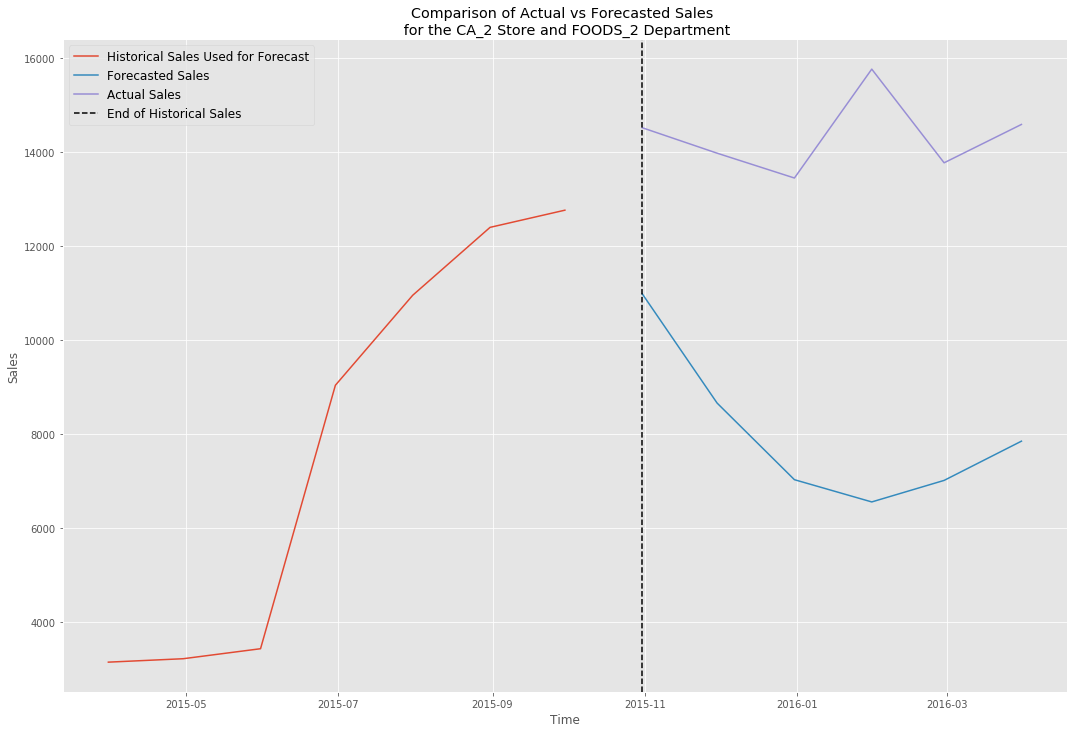

In [101]:
updated_six_period_plot_forecast_vs_arima(12)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -463.686
Date:                Wed, 03 Jun 2020   AIC                            933.373
Time:                        09:21:41   BIC                            939.395
Sample:                             0   HQIC                           935.701
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     88.5211    143.578      0.617      0.538    -192.887     369.929
ar.L1         -0.2293      0.083     -2.751      0.006      -0.393      -0.066
sigma2      1.173e+06   2.34e+05      5.009      0.0

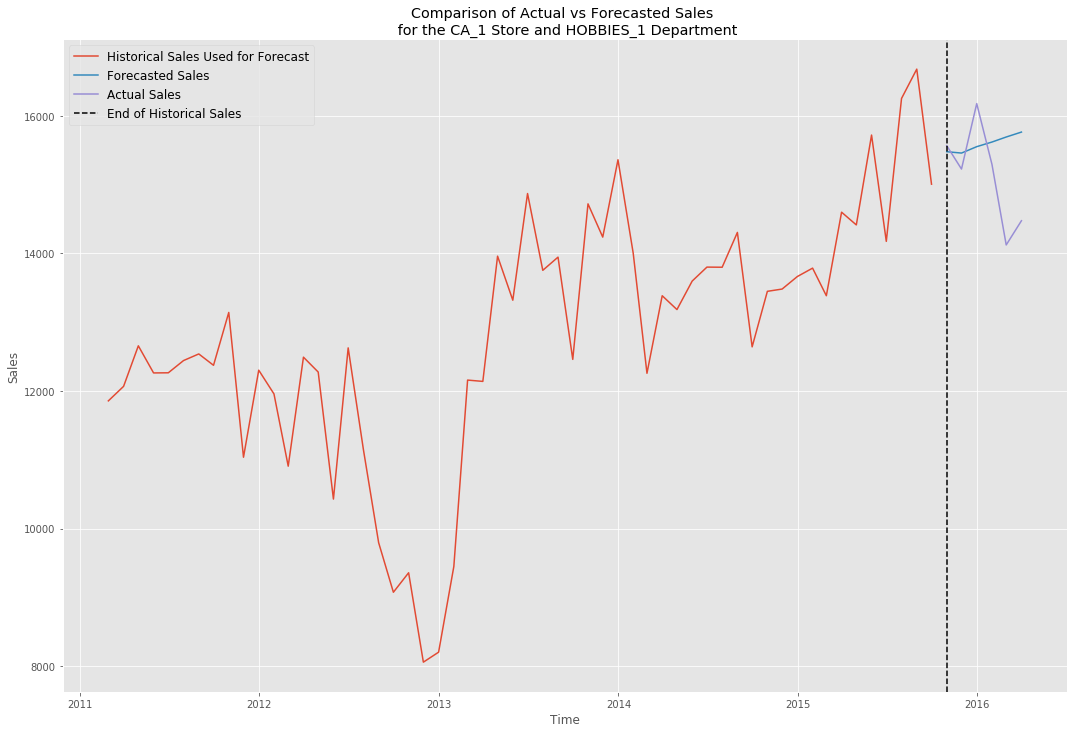

In [98]:
updated_six_period_plot_forecast_vs_arima(0)

In [88]:
updated_six_period_plot_forecast_vs_arima(1)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [92]:
len(series_lst6[1])

18

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   56
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -464.974
Date:                            Wed, 03 Jun 2020   AIC                            935.949
Time:                                    09:22:07   BIC                            941.971
Sample:                                         0   HQIC                           938.278
                                             - 56                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    190.4699    144.100      1.322      0.186     -91.961     472.901
ar.S.L12       0.3833      0.086   

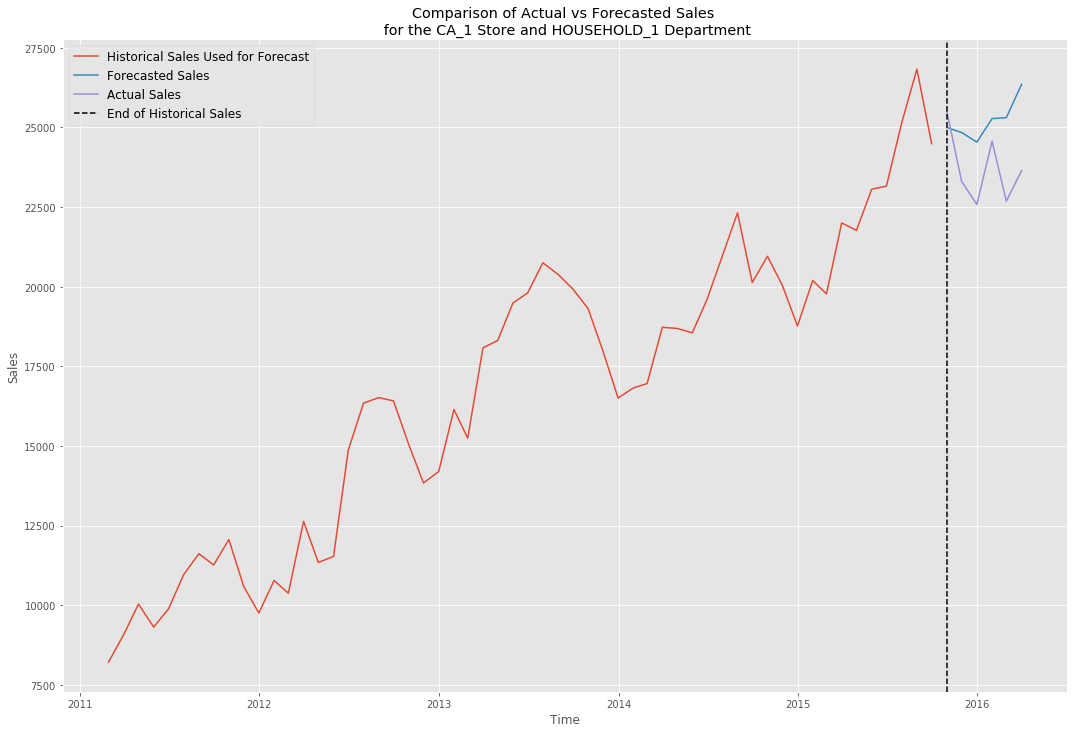

In [99]:
updated_six_period_plot_forecast_vs_arima(2)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -469.819
Date:                Wed, 03 Jun 2020   AIC                            943.638
Time:                        09:22:40   BIC                            947.653
Sample:                             0   HQIC                           945.191
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    295.9273    167.776      1.764      0.078     -32.907     624.761
sigma2      1.539e+06   3.31e+05      4.651      0.000     8.9e+05    2.19e+06
Ljung-Box (Q):                       69.54   Jarque-

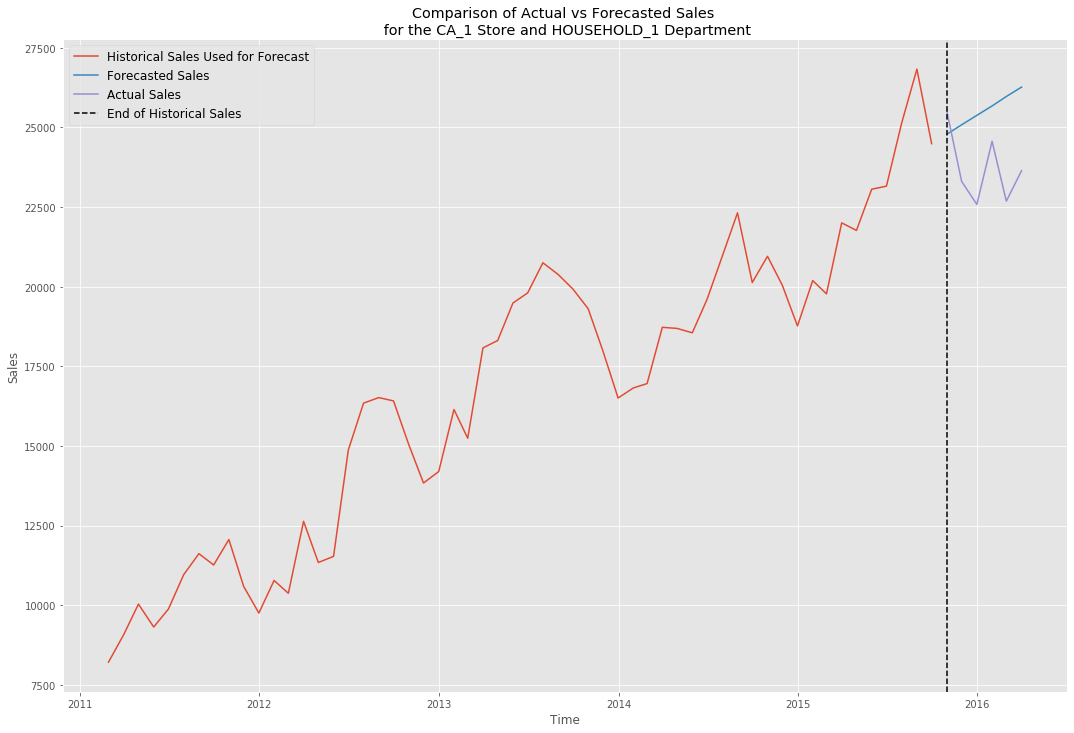

In [102]:
updated_six_period_plot_forecast_vs_arima(2)